# EDA - Characteristics of Genre

In this notebook, we perform Exploratory Data Analysis on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
songdata = pd.read_csv('data/genre_music.csv')

#songdata.info()

In [3]:
print('Original shape: ', songdata.shape)

Original shape:  (41099, 20)


In [4]:
songdata.track.duplicated().sum()

5246

In [5]:
songdata.drop_duplicates(subset=['track'], keep='first', inplace=True)
print('New shape: ', songdata.shape)
songdata.head()

New shape:  (35853, 20)


,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,edm
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,pop
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,pop
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,pop
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,r&b


## Split data set to separate DataFrames based on Genre

In [6]:
test_data = songdata

In [7]:
edm_data = test_data.loc[(test_data['genre'] == 'edm')]
latin_data = test_data.loc[(test_data['genre'] == 'latin')]
pop_data = test_data.loc[(test_data['genre'] == 'pop')]
rb_data = test_data.loc[(test_data['genre'] == 'r&b')]
rap_data = test_data.loc[(test_data['genre'] == 'rap')]
rock_data = test_data.loc[(test_data['genre'] == 'rock')]

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35853 entries, 0 to 41095
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             35853 non-null  object 
 1   artist            35853 non-null  object 
 2   danceability      35853 non-null  float64
 3   energy            35853 non-null  float64
 4   key               35853 non-null  int64  
 5   loudness          35853 non-null  float64
 6   mode              35853 non-null  int64  
 7   speechiness       35853 non-null  float64
 8   acousticness      35853 non-null  float64
 9   instrumentalness  35853 non-null  float64
 10  liveness          35853 non-null  float64
 11  valence           35853 non-null  float64
 12  tempo             35853 non-null  float64
 13  duration_s        35853 non-null  float64
 14  time_signature    35853 non-null  int64  
 15  chorus_hit        35853 non-null  float64
 16  sections          35853 non-null  int64 

In [9]:
edm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 41085
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             1306 non-null   object 
 1   artist            1306 non-null   object 
 2   danceability      1306 non-null   float64
 3   energy            1306 non-null   float64
 4   key               1306 non-null   int64  
 5   loudness          1306 non-null   float64
 6   mode              1306 non-null   int64  
 7   speechiness       1306 non-null   float64
 8   acousticness      1306 non-null   float64
 9   instrumentalness  1306 non-null   float64
 10  liveness          1306 non-null   float64
 11  valence           1306 non-null   float64
 12  tempo             1306 non-null   float64
 13  duration_s        1306 non-null   float64
 14  time_signature    1306 non-null   int64  
 15  chorus_hit        1306 non-null   float64
 16  sections          1306 non-null   int64  

In [10]:
latin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 66 to 35841
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             2469 non-null   object 
 1   artist            2469 non-null   object 
 2   danceability      2469 non-null   float64
 3   energy            2469 non-null   float64
 4   key               2469 non-null   int64  
 5   loudness          2469 non-null   float64
 6   mode              2469 non-null   int64  
 7   speechiness       2469 non-null   float64
 8   acousticness      2469 non-null   float64
 9   instrumentalness  2469 non-null   float64
 10  liveness          2469 non-null   float64
 11  valence           2469 non-null   float64
 12  tempo             2469 non-null   float64
 13  duration_s        2469 non-null   float64
 14  time_signature    2469 non-null   int64  
 15  chorus_hit        2469 non-null   float64
 16  sections          2469 non-null   int64 

In [11]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14329 entries, 1 to 35852
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             14329 non-null  object 
 1   artist            14329 non-null  object 
 2   danceability      14329 non-null  float64
 3   energy            14329 non-null  float64
 4   key               14329 non-null  int64  
 5   loudness          14329 non-null  float64
 6   mode              14329 non-null  int64  
 7   speechiness       14329 non-null  float64
 8   acousticness      14329 non-null  float64
 9   instrumentalness  14329 non-null  float64
 10  liveness          14329 non-null  float64
 11  valence           14329 non-null  float64
 12  tempo             14329 non-null  float64
 13  duration_s        14329 non-null  float64
 14  time_signature    14329 non-null  int64  
 15  chorus_hit        14329 non-null  float64
 16  sections          14329 non-null  int64 

In [12]:
rb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9455 entries, 4 to 35849
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             9455 non-null   object 
 1   artist            9455 non-null   object 
 2   danceability      9455 non-null   float64
 3   energy            9455 non-null   float64
 4   key               9455 non-null   int64  
 5   loudness          9455 non-null   float64
 6   mode              9455 non-null   int64  
 7   speechiness       9455 non-null   float64
 8   acousticness      9455 non-null   float64
 9   instrumentalness  9455 non-null   float64
 10  liveness          9455 non-null   float64
 11  valence           9455 non-null   float64
 12  tempo             9455 non-null   float64
 13  duration_s        9455 non-null   float64
 14  time_signature    9455 non-null   int64  
 15  chorus_hit        9455 non-null   float64
 16  sections          9455 non-null   int64  

In [13]:
rap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 45 to 35825
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             2104 non-null   object 
 1   artist            2104 non-null   object 
 2   danceability      2104 non-null   float64
 3   energy            2104 non-null   float64
 4   key               2104 non-null   int64  
 5   loudness          2104 non-null   float64
 6   mode              2104 non-null   int64  
 7   speechiness       2104 non-null   float64
 8   acousticness      2104 non-null   float64
 9   instrumentalness  2104 non-null   float64
 10  liveness          2104 non-null   float64
 11  valence           2104 non-null   float64
 12  tempo             2104 non-null   float64
 13  duration_s        2104 non-null   float64
 14  time_signature    2104 non-null   int64  
 15  chorus_hit        2104 non-null   float64
 16  sections          2104 non-null   int64 

In [14]:
rock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6190 entries, 16 to 35851
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6190 non-null   object 
 1   artist            6190 non-null   object 
 2   danceability      6190 non-null   float64
 3   energy            6190 non-null   float64
 4   key               6190 non-null   int64  
 5   loudness          6190 non-null   float64
 6   mode              6190 non-null   int64  
 7   speechiness       6190 non-null   float64
 8   acousticness      6190 non-null   float64
 9   instrumentalness  6190 non-null   float64
 10  liveness          6190 non-null   float64
 11  valence           6190 non-null   float64
 12  tempo             6190 non-null   float64
 13  duration_s        6190 non-null   float64
 14  time_signature    6190 non-null   int64  
 15  chorus_hit        6190 non-null   float64
 16  sections          6190 non-null   int64 

In [10]:
genre_list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_s', 'time_signature',
              'chorus_hit', 'sections', 'popularity'
             ]

#1: EDM --> Outlier Count =  15
#2: Latin --> Outlier Count =  7
#3: Pop --> Outlier Count =  13
#4: R&B --> Outlier Count =  0
#5: Rap --> Outlier Count =  9
#6: Rock --> Outlier Count =  1

#1: EDM --> Outlier Count =  0
#2: Latin --> Outlier Count =  0
#3: Pop --> Outlier Count =  0
#4: R&B --> Outlier Count =  0
#5: Rap --> Outlier Count =  6
#6: Rock --> Outlier Count =  0

#1: EDM --> Outlier Count =  0
#2: Latin --> Outlier Count =  0
#3: Pop --> Outlier Count =  0
#4: R&B --> Outlier Count =  0
#5: Rap --> Outlier Count =  0
#6: Rock --> Outlier Count =  0

#1: EDM --> Outlier Count =  18
#2: Latin --> Outlier Count =  64
#3: Pop --> Outlier Count =  379
#4: R&B --> Outlier Count =  179
#5: Rap --> Outlier Count =  97
#6: Rock --> Outlier Count =  125

#1: EDM --> Outlier Count =  0
#2: Latin --> Outlier Count =  0
#3: Pop --> Outlier Count =  0
#4: R&B --> Outlier Count =  0
#5: Rap --> Outlier Count =  0
#6: Rock --> Outlier Count =  0

#1: EDM --> Outlier Count =  97
#2: Lat

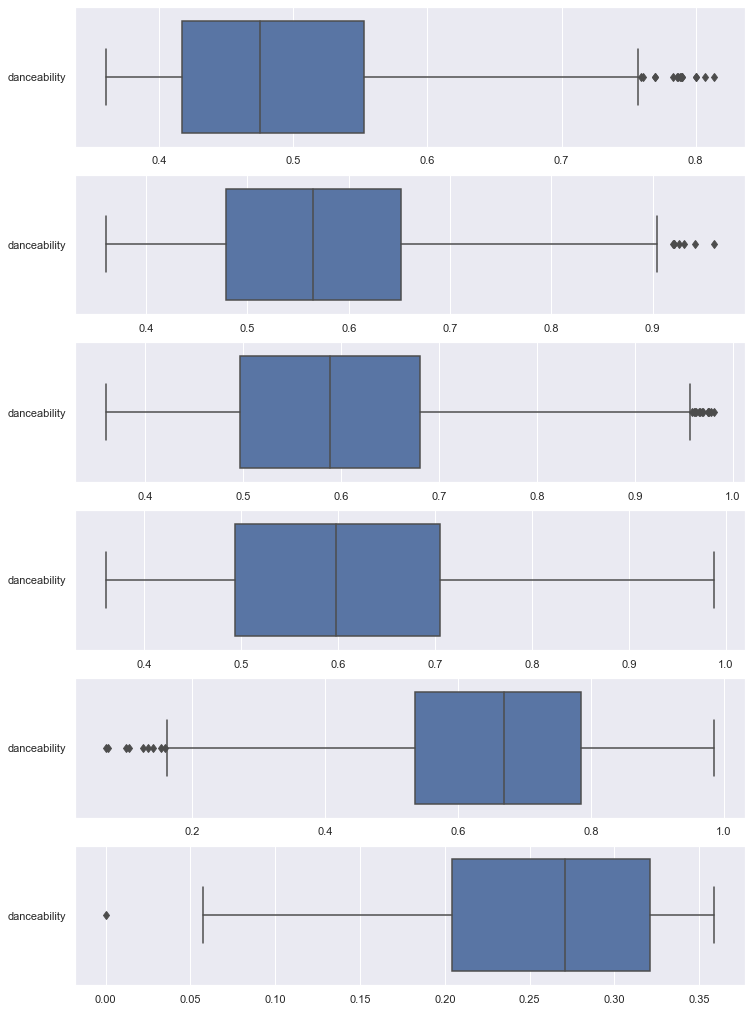

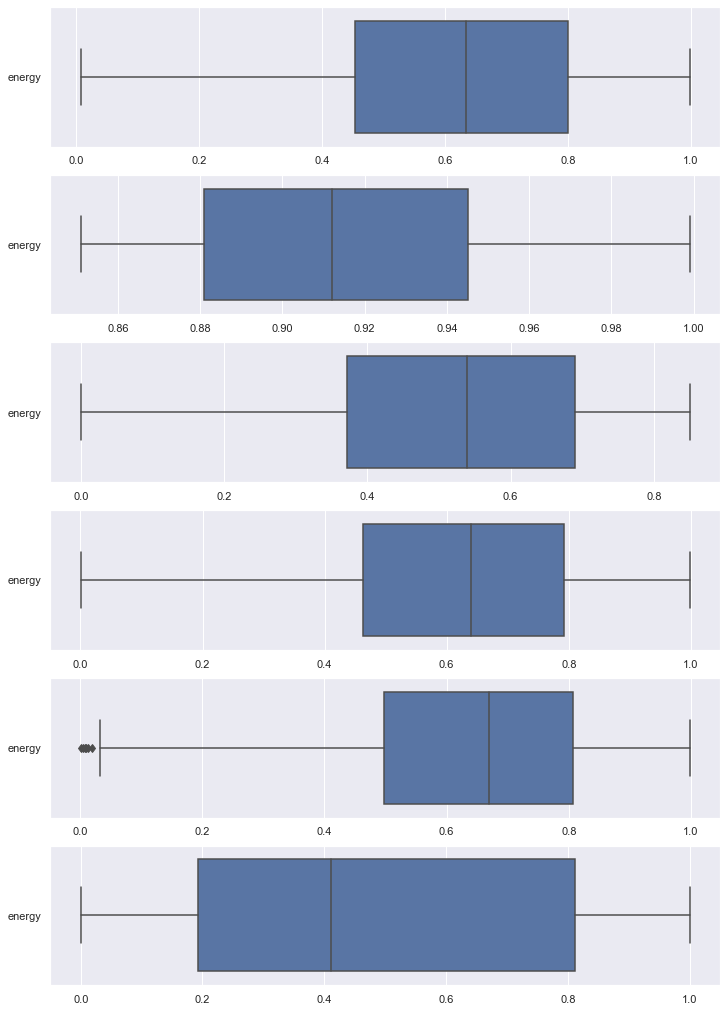

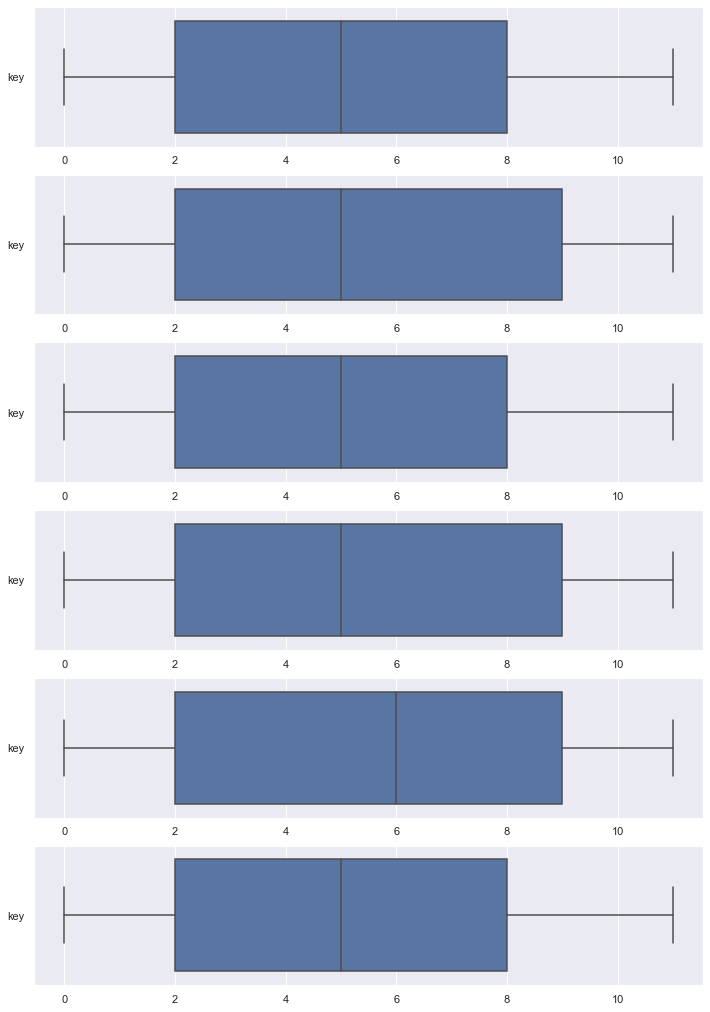

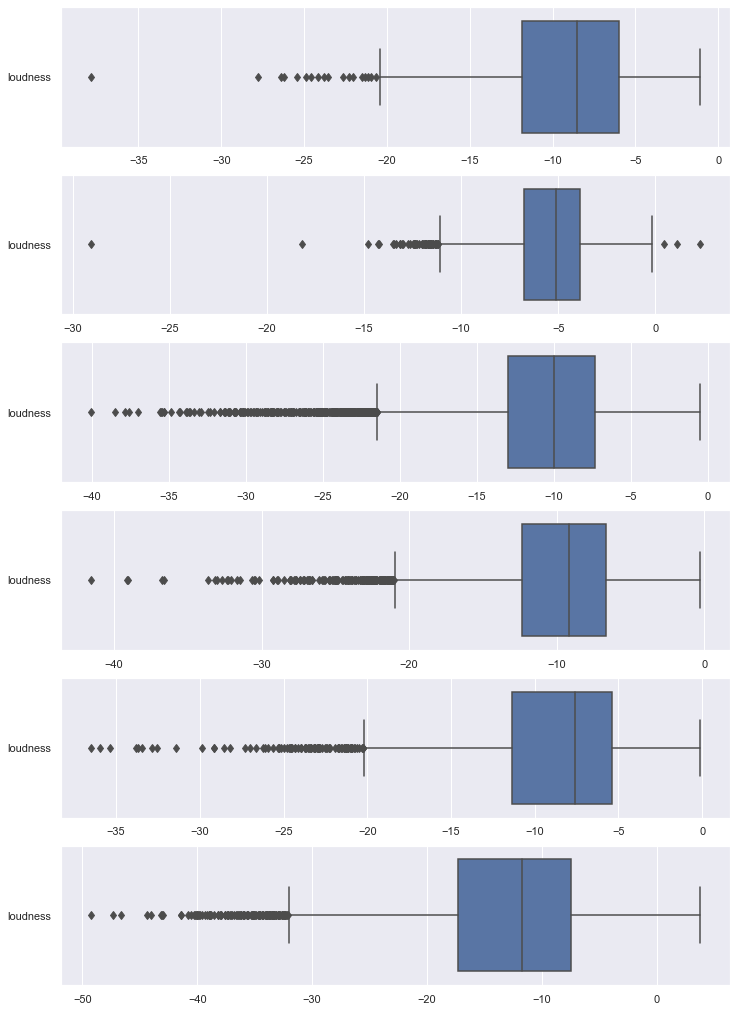

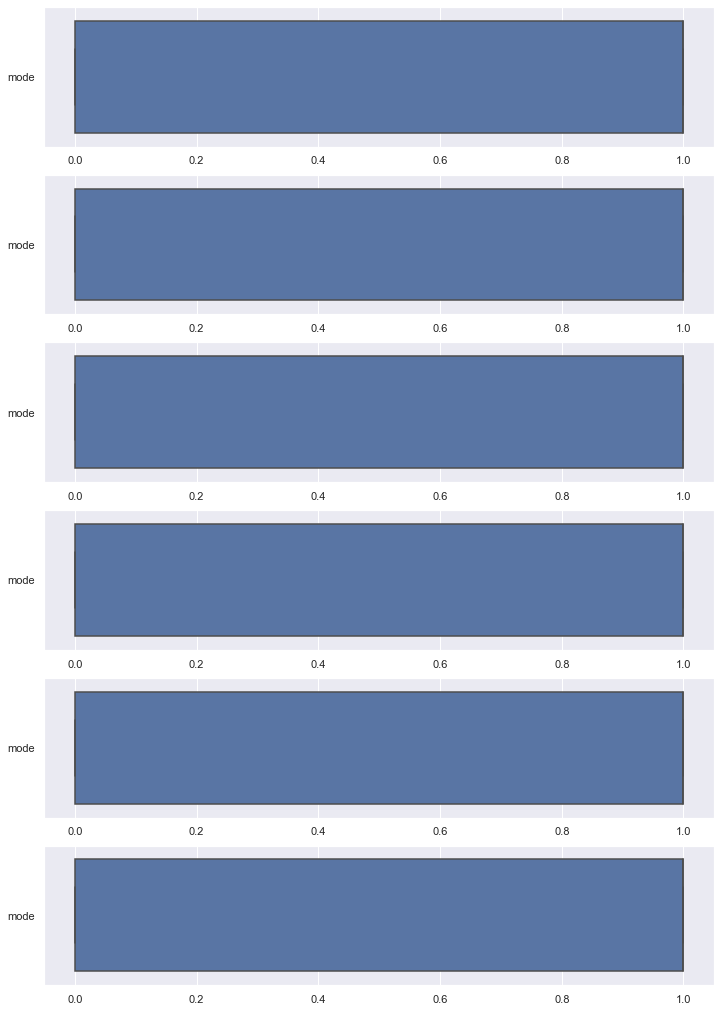

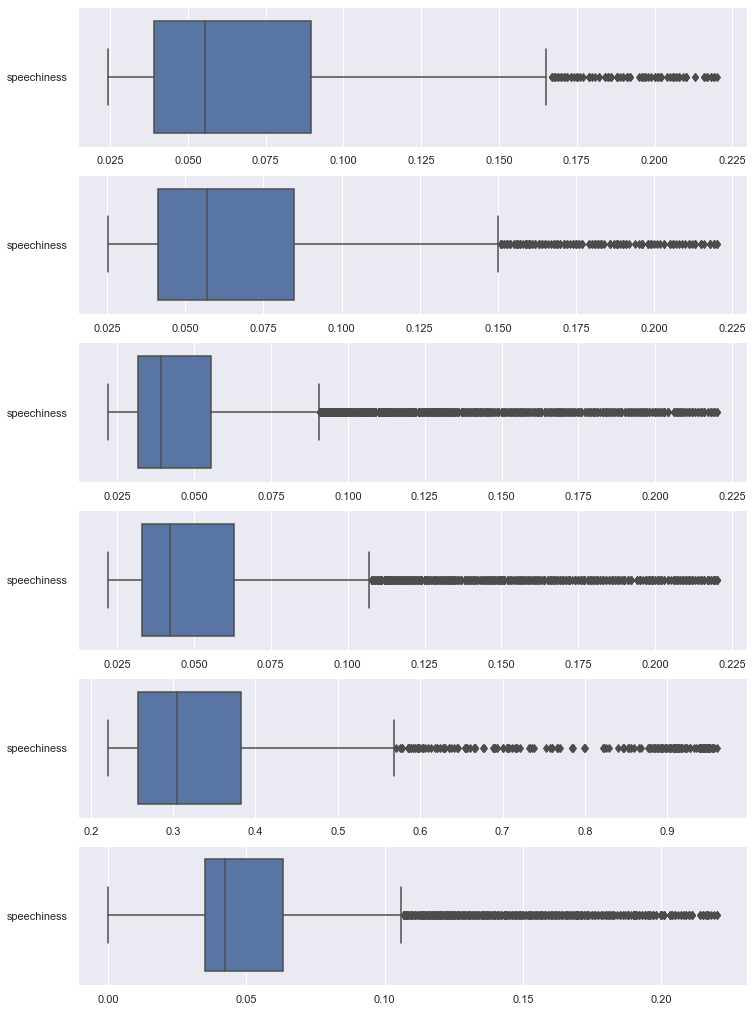

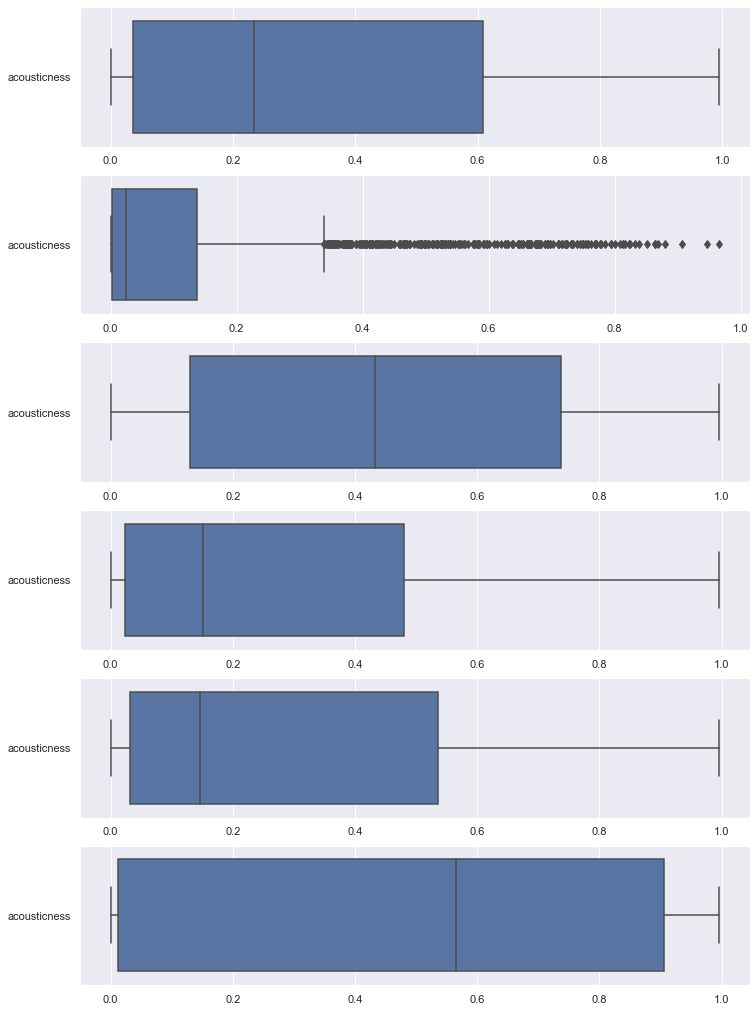

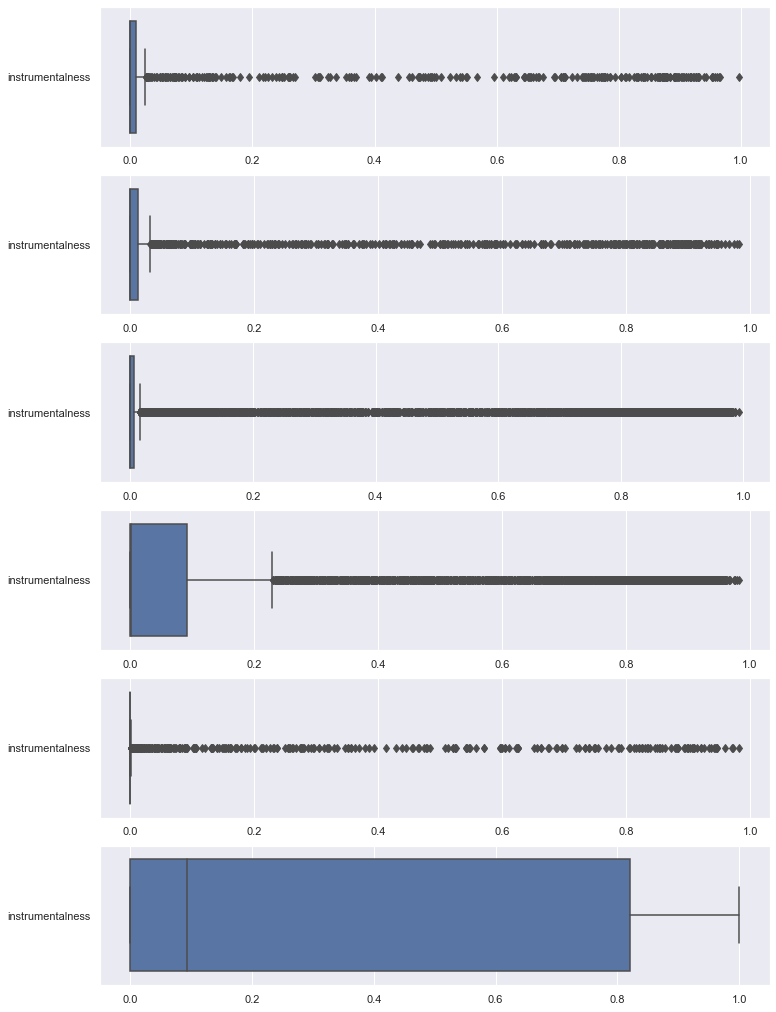

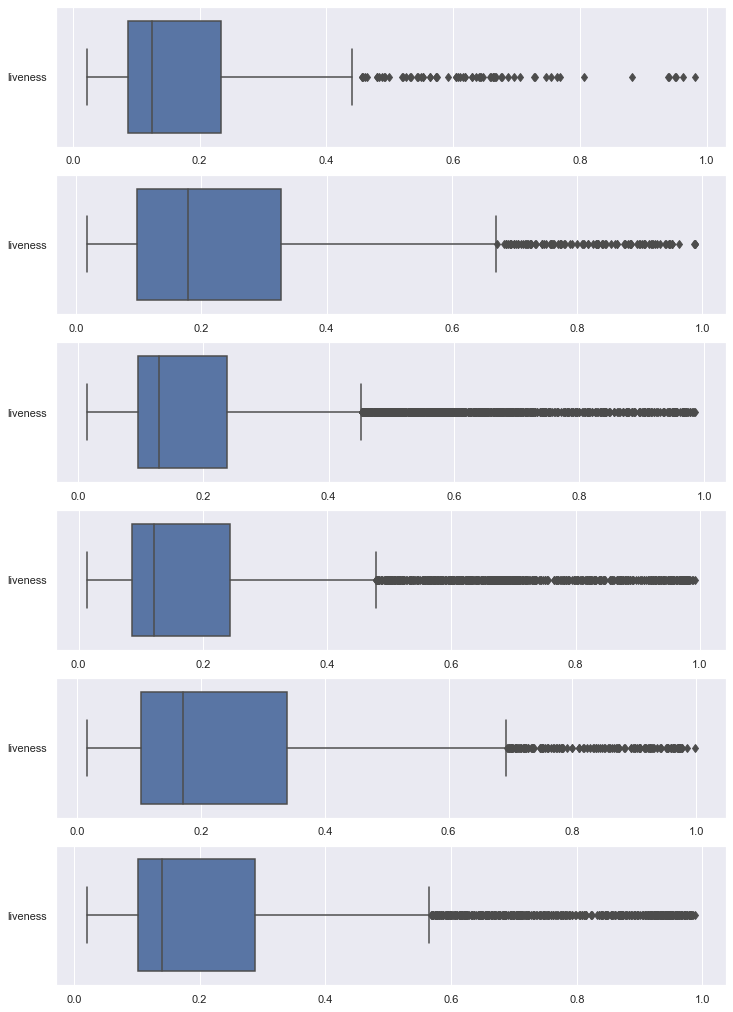

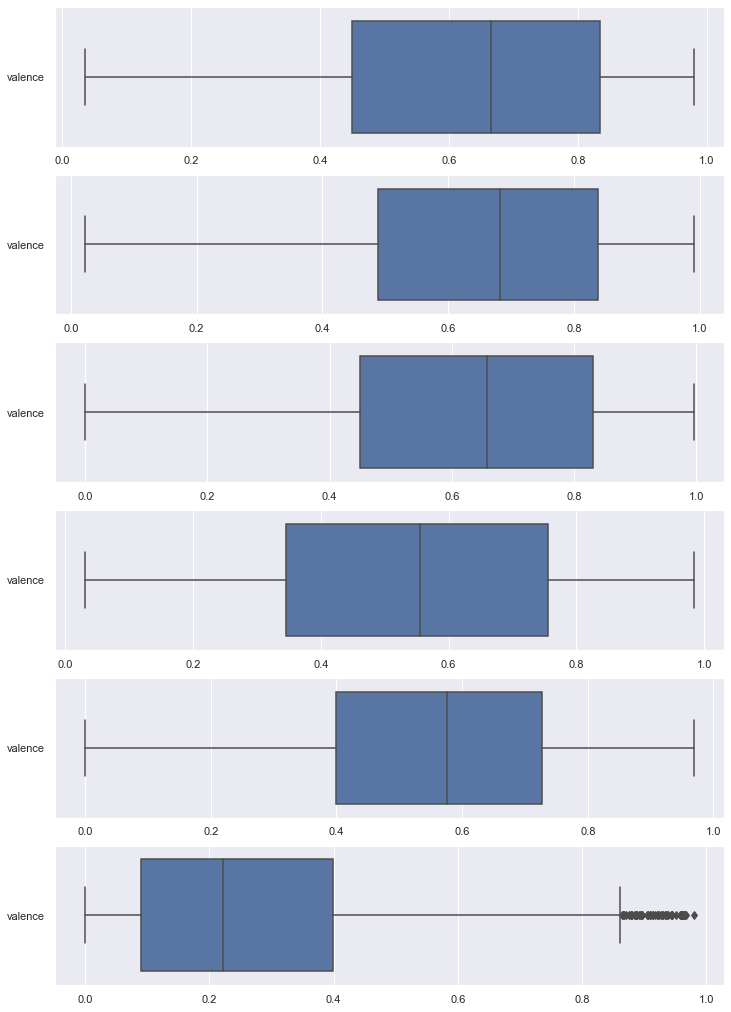

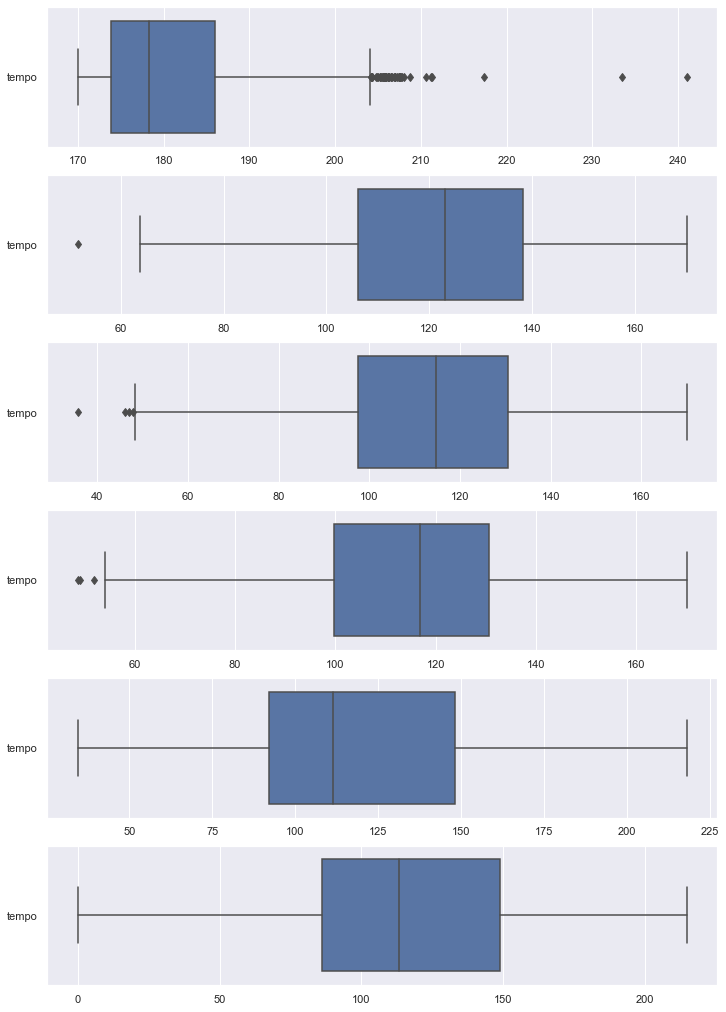

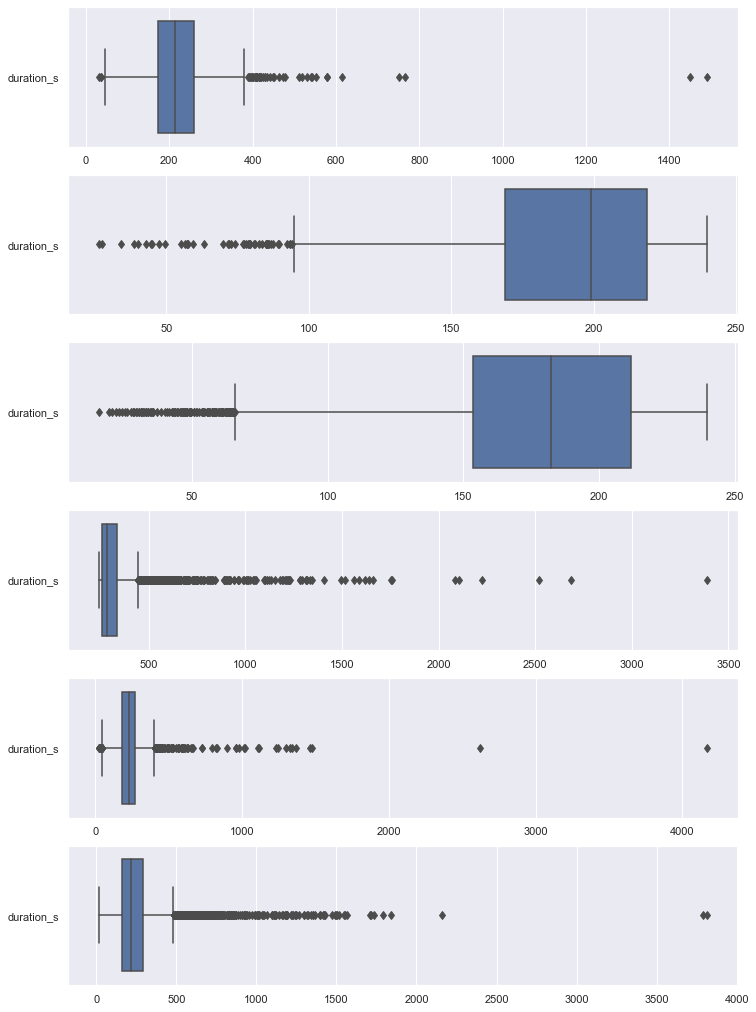

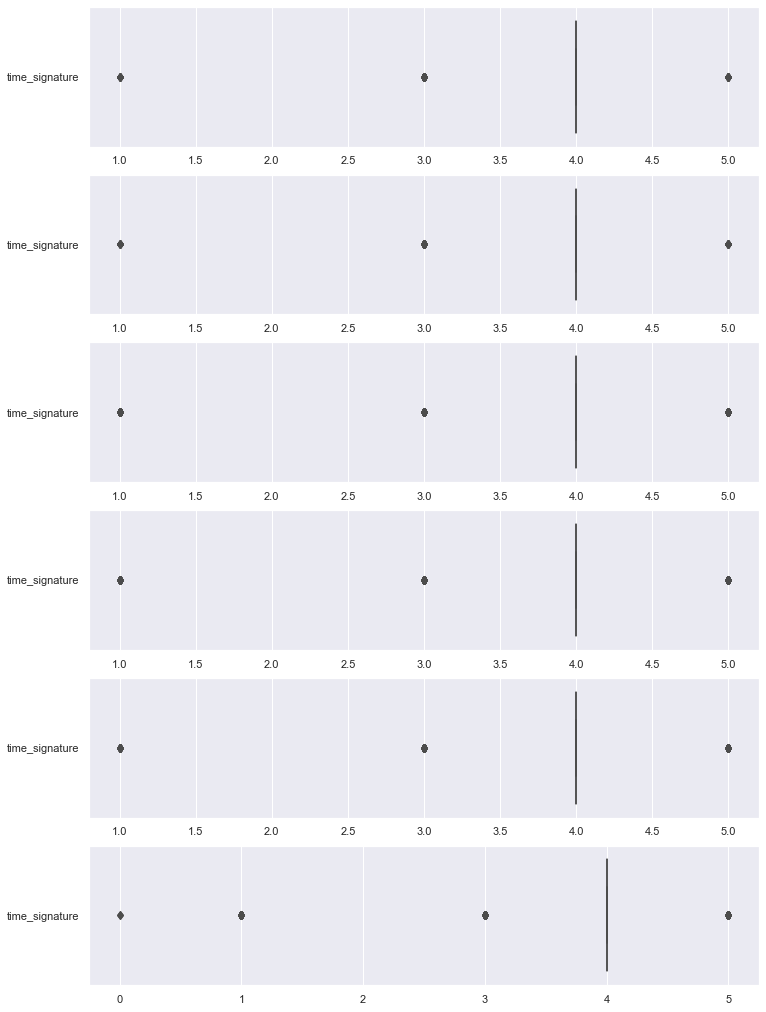

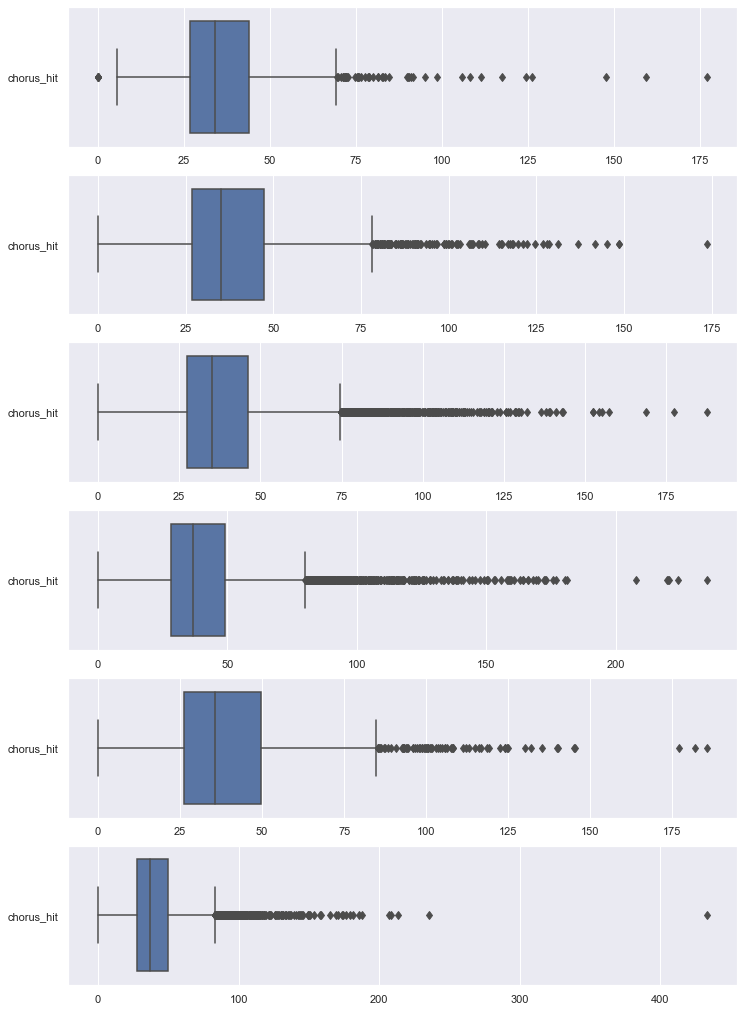

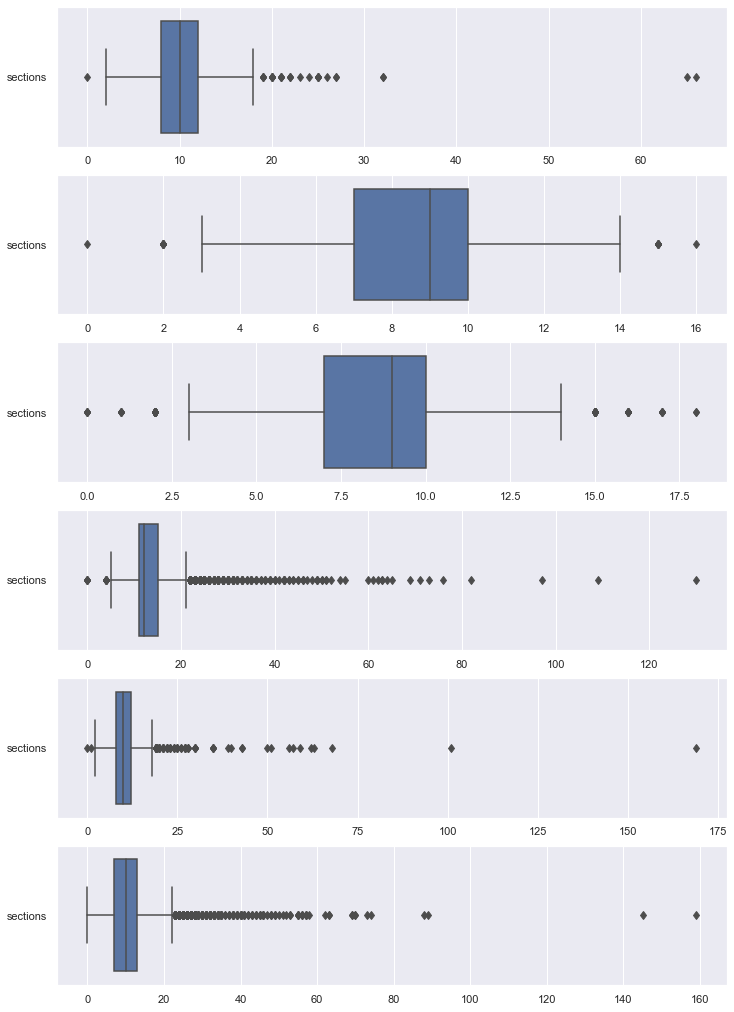

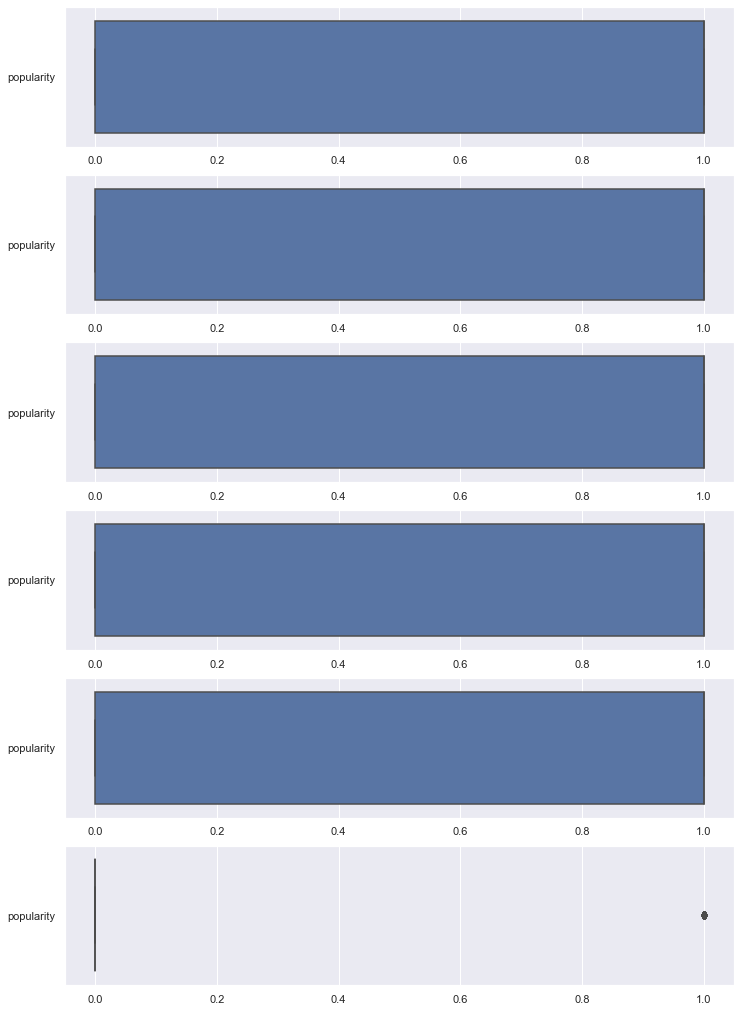

In [12]:
# import data about boxplots from matplotlib (since SeaBorn uses MatPlotLib for plotting)
from matplotlib.cbook import boxplot_stats 

for var in genre_list:
    f_bar, axes_foo = plt.subplots(6, 1, figsize=(12,18))

    edm_foo = pd.DataFrame(edm_data[var])
    latin_foo = pd.DataFrame(latin_data[var])
    pop_foo = pd.DataFrame(pop_data[var])
    rb_foo = pd.DataFrame(rb_data[var])
    rap_foo = pd.DataFrame(rap_data[var])
    rock_foo = pd.DataFrame(rock_data[var])
    
    
    
    print("#1: EDM --> Outlier Count = ", len(boxplot_stats(edm_foo).pop(0)['fliers']))
    sb.boxplot(data = edm_foo, orient = "h", ax = axes_foo[0], fliersize = 6.0)
    print("#2: Latin --> Outlier Count = ", len(boxplot_stats(latin_foo).pop(0)['fliers']))
    sb.boxplot(data = latin_foo, orient = "h", ax = axes_foo[1], fliersize = 6.0)
    print("#3: Pop --> Outlier Count = ", len(boxplot_stats(pop_foo).pop(0)['fliers']))
    sb.boxplot(data = pop_foo, orient = "h", ax = axes_foo[2], fliersize = 6.0)
    print("#4: R&B --> Outlier Count = ", len(boxplot_stats(rb_foo).pop(0)['fliers']))
    sb.boxplot(data = rb_foo, orient = "h", ax = axes_foo[3], fliersize = 6.0)
    print("#5: Rap --> Outlier Count = ", len(boxplot_stats(rap_foo).pop(0)['fliers']))
    sb.boxplot(data = rap_foo, orient = "h", ax = axes_foo[4], fliersize = 6.0)
    print("#6: Rock --> Outlier Count = ", len(boxplot_stats(rock_foo).pop(0)['fliers']))
    sb.boxplot(data = rock_foo, orient = "h", ax = axes_foo[5], fliersize = 6.0)
    print()

### To clean up scaling of box-plots if/when used for presentation

In [ ]:
# Box Plot 2 of 16: Energy

f_energy, axes_energy = plt.subplots(6, 1, figsize=(12, 18))

edm_energy = pd.DataFrame(edm_data['energy'])
latin_energy = pd.DataFrame(latin_data['energy'])
pop_energy = pd.DataFrame(pop_data['energy'])
rb_energy = pd.DataFrame(rb_data['energy'])
rap_energy = pd.DataFrame(rap_data['energy'])
rock_energy = pd.DataFrame(rock_data['energy'])


print("#1: EDM --> Outlier Count = ", len(boxplot_stats(edm_energy).pop(0)['fliers']))
sb.boxplot(data = edm_energy, orient = "h", ax = axes_energy[0], fliersize = 6.0)
print("#2: Latin --> Outlier Count = ", len(boxplot_stats(latin_energy).pop(0)['fliers']))
sb.boxplot(data = latin_energy, orient = "h", ax = axes_energy[1], fliersize = 6.0)
print("#3: Pop --> Outlier Count = ", len(boxplot_stats(pop_energy).pop(0)['fliers']))
sb.boxplot(data = pop_energy, orient = "h", ax = axes_energy[2], fliersize = 6.0)
print("#4: R&B --> Outlier Count = ", len(boxplot_stats(rb_energy).pop(0)['fliers']))
sb.boxplot(data = rb_energy, orient = "h", ax = axes_energy[3], fliersize = 6.0)
print("#5: Rap --> Outlier Count = ", len(boxplot_stats(rap_energy).pop(0)['fliers']))
sb.boxplot(data = rap_energy, orient = "h", ax = axes_energy[4], fliersize = 6.0)
print("#6: Rock --> Outlier Count = ", len(boxplot_stats(rock_energy).pop(0)['fliers']))
sb.boxplot(data = rock_energy, orient = "h", ax = axes_energy[5], fliersize = 6.0)